# Case Study 1: Using Numpy, Pandas, Matplotlib
## Sales Analysis for a Retail Store
### Problem Statement:
A small retail store is looking to manage and optimize their inventory. They want to identify which products are in high demand, which products are not selling. The dataset has daily sales data for each product.

Dataset: Sales.csv

Dataset description:
- Order ID - Each order receives its own Order ID that will not be duplicated. 
- Product – The name of the product that has been sold.
- Quantity Ordered – The total item quantity ordered in the initial order.
- Price Each - The price of each product.
- Order Date - This is the date the customer is requesting the order be shipped.
- Purchase Address – Billing address.

Approach:

- Load the dataset into a Pandas DataFrame.
- Data exploration, Data cleaning.
- Use pandas to calculate key metrics such as
- Total sales for each product.
- Average sales for each product per day.
- Use Matplotlib to create visualizations and identify 
- Highest selling products. Which products are sold the most?
- Which city had highest number of sales?


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('Sales.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity Ordered  9697 non-null   object
 3   Price Each        9697 non-null   object
 4   Order Date        9697 non-null   object
 5   Purchase Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


## Cleaning and Preparing Data 

In [4]:
df.shape

(9723, 6)

In [5]:
df.isna().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [6]:
df.isnull().sum()

Order ID            26
Product             26
Quantity Ordered    26
Price Each          26
Order Date          26
Purchase Address    26
dtype: int64

In [7]:
df.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,9697,9697,9697,9697,9697,9697
unique,9269,20,8,19,8077,9161
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,16,1171,8795,1171,16,16


##### Renaming columns - removing spaces from names  

In [8]:
df.columns

Index(['Order ID', 'Product', 'Quantity Ordered', 'Price Each', 'Order Date',
       'Purchase Address'],
      dtype='object')

In [9]:
df = df.rename(columns={
    'Order ID': 'Order_ID',
    'Quantity Ordered':'Quantity_Ordered', 
    'Price Each':'Price_Each', 
    'Order Date':'Order_Date',
    'Purchase Address':'Purchase_Address'
})

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Order_ID          9697 non-null   object
 1   Product           9697 non-null   object
 2   Quantity_Ordered  9697 non-null   object
 3   Price_Each        9697 non-null   object
 4   Order_Date        9697 non-null   object
 5   Purchase_Address  9697 non-null   object
dtypes: object(6)
memory usage: 455.9+ KB


##### Changing Order_Date type from object to datetime 

In [11]:
df.Order_Date

0       01/22/19 21:25
1       01/28/19 14:15
2       01/17/19 13:33
3       01/05/19 20:33
4       01/25/19 11:59
             ...      
9718    01/26/19 19:09
9719    01/10/19 22:58
9720    01/21/19 14:31
9721    01/15/19 14:21
9722    01/13/19 16:43
Name: Order_Date, Length: 9723, dtype: object

In [12]:
df['Order_Date']=pd.to_datetime(df['Order_Date'], errors='coerce', format='%m/%d/%y %H:%M')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9697 non-null   object        
 1   Product           9697 non-null   object        
 2   Quantity_Ordered  9697 non-null   object        
 3   Price_Each        9697 non-null   object        
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9697 non-null   object        
dtypes: datetime64[ns](1), object(5)
memory usage: 455.9+ KB


In [14]:
df.Order_Date

0      2019-01-22 21:25:00
1      2019-01-28 14:15:00
2      2019-01-17 13:33:00
3      2019-01-05 20:33:00
4      2019-01-25 11:59:00
               ...        
9718   2019-01-26 19:09:00
9719   2019-01-10 22:58:00
9720   2019-01-21 14:31:00
9721   2019-01-15 14:21:00
9722   2019-01-13 16:43:00
Name: Order_Date, Length: 9723, dtype: datetime64[ns]

##### Removing Duplicate values

In [15]:
df.loc[df['Order_ID'] == "Order ID"]

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address
1073,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3115,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3247,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3612,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
3623,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address
4901,Order ID,Product,Quantity Ordered,Price Each,NaT,Purchase Address


In [16]:
(df['Order_ID'] == "Order ID").sum()

16

In [17]:
df['Order_ID']=pd.to_numeric(df['Order_ID'], errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9723 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9681 non-null   float64       
 1   Product           9697 non-null   object        
 2   Quantity_Ordered  9697 non-null   object        
 3   Price_Each        9697 non-null   object        
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9697 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 455.9+ KB


#### Dropping NaN/Null values 

In [19]:
df.isna().sum()

Order_ID            42
Product             26
Quantity_Ordered    26
Price_Each          26
Order_Date          42
Purchase_Address    26
dtype: int64

In [20]:
df.dropna(inplace=True)

In [21]:
df.shape

(9681, 6)

In [22]:
df.isna().sum()

Order_ID            0
Product             0
Quantity_Ordered    0
Price_Each          0
Order_Date          0
Purchase_Address    0
dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9681 non-null   float64       
 1   Product           9681 non-null   object        
 2   Quantity_Ordered  9681 non-null   object        
 3   Price_Each        9681 non-null   object        
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9681 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 529.4+ KB


##### Converting Quantity_Ordered from Object to Int dtype 

In [24]:
df['Quantity_Ordered']=pd.to_numeric(df['Quantity_Ordered'])

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9681 non-null   float64       
 1   Product           9681 non-null   object        
 2   Quantity_Ordered  9681 non-null   int64         
 3   Price_Each        9681 non-null   object        
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9681 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 529.4+ KB


##### Converting Price_Each to Float 

In [26]:
df['Price_Each']=pd.to_numeric(df['Price_Each'])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9722
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9681 non-null   float64       
 1   Product           9681 non-null   object        
 2   Quantity_Ordered  9681 non-null   int64         
 3   Price_Each        9681 non-null   float64       
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9681 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 529.4+ KB


##### Extracting City from Purchase_Address

In [28]:
df['Purchase_Address']

0             944 Walnut St, Boston, MA 02215
1            185 Maple St, Portland, OR 97035
2       538 Adams St, San Francisco, CA 94016
3          738 10th St, Los Angeles, CA 90001
4               387 10th St, Austin, TX 73301
                        ...                  
9718              95 8th St, Dallas, TX 75001
9719      403 7th St, San Francisco, CA 94016
9720          214 Main St, Portland, OR 97035
9721        810 2nd St, Los Angeles, CA 90001
9722           428 Cedar St, Boston, MA 02215
Name: Purchase_Address, Length: 9681, dtype: object

In [29]:
df["City"] = df["Purchase_Address"].apply(lambda x:x.split(',')[1].strip())

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9681 entries, 0 to 9722
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Order_ID          9681 non-null   float64       
 1   Product           9681 non-null   object        
 2   Quantity_Ordered  9681 non-null   int64         
 3   Price_Each        9681 non-null   float64       
 4   Order_Date        9681 non-null   datetime64[ns]
 5   Purchase_Address  9681 non-null   object        
 6   City              9681 non-null   object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 605.1+ KB


In [31]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin


##### Extracting Month from Order_Date

In [32]:
df['Month']=pd.DatetimeIndex(df.Order_Date).month

In [33]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Month
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,1
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,1
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,1
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,1
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,1


## Answering Questions 

###  Q1. Total sales for each product.

In [34]:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']

In [35]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Month,Sales
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,1,700.00
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,1,14.95
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,1,23.98
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,1,11.99


In [36]:
# df.groupby(['Product'])[['Quantity_Ordered','Sales']].sum().sort_values('Quantity_Ordered', ascending=False)

In [37]:
df.groupby(['Product'])[['Quantity_Ordered','Sales']].sum()

,Quantity_Ordered,Sales
Product,,
20in Monitor,215,23647.85
27in 4K Gaming Monitor,312,121676.88
27in FHD Monitor,419,62845.81
34in Ultrawide Monitor,314,119316.86
AA Batteries (4-pack),1425,5472.00
AAA Batteries (4-pack),1596,4772.04
Apple Airpods Headphones,814,122100.00
Bose SoundSport Headphones,659,65893.41
Flatscreen TV,243,72900.00


### Q 2. Average sales for each product per day.

In [38]:
df['Day']= df['Order_Date'].dt.day_name()

In [39]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Month,Sales,Day
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,1,700.00,Tuesday
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,1,14.95,Monday
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,1,23.98,Thursday
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99,Saturday
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,1,11.99,Friday


In [40]:
Avg_Sales = df.groupby(['Product', 'Day'])[['Sales']].mean()


In [41]:
Avg_Sales.head(10)

Sales
Product                Day                  
20in Monitor           Friday     109.990000
                       Monday     109.990000
                       Saturday   115.227619
                       Sunday     109.990000
                       Thursday   109.990000
                       Tuesday    109.990000
                       Wednesday  112.434222
27in 4K Gaming Monitor Friday     389.990000
                       Monday     389.990000
                       Saturday   389.990000

### Q3. Highest selling products. Which products are sold the most?

In [42]:
Highest_Selling_Products = df.groupby(['Product'])[['Quantity_Ordered']].sum().sort_values(by='Quantity_Ordered', ascending=False)

In [43]:
Highest_Selling_Products.head(10)

,Quantity_Ordered
Product,
AAA Batteries (4-pack),1596
AA Batteries (4-pack),1425
USB-C Charging Cable,1284
Lightning Charging Cable,1151
Wired Headphones,1081
Apple Airpods Headphones,814
Bose SoundSport Headphones,659
27in FHD Monitor,419
iPhone,379


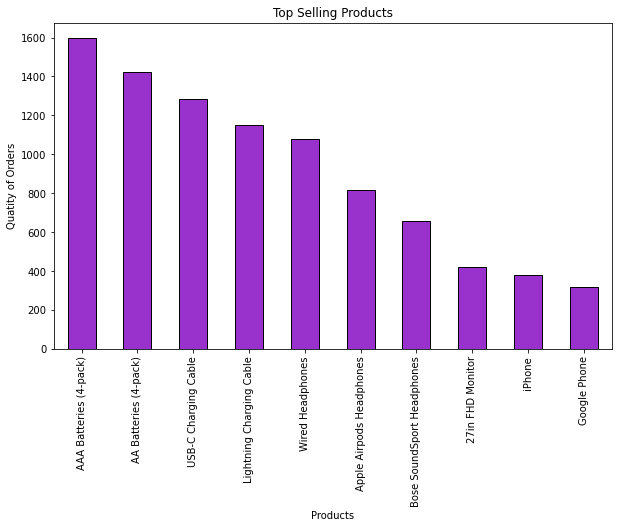

In [44]:
Highest_Selling_Products.head(10).plot(kind='bar', figsize=(10,6) , color='darkorchid', edgecolor='black')
plt.title('Top Selling Products')
plt.xlabel('Products')
plt.ylabel('Quatity of Orders')
plt.legend().set_visible(False)
plt.show()

Conclusion - AAA Batteries (4-pack) is the highest selling product, followed by AA BAtteries( 4-pack), USB-C Charging Cable and so on as shown above.

### Q4. Which city had highest number of sales?

In [45]:
df.head()

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,City,Month,Sales,Day
0,141234.0,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",Boston,1,700.00,Tuesday
1,141235.0,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",Portland,1,14.95,Monday
2,141236.0,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",San Francisco,1,23.98,Thursday
3,141237.0,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",Los Angeles,1,149.99,Saturday
4,141238.0,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",Austin,1,11.99,Friday


In [46]:
df['City'].unique()

array(['Boston', 'Portland', 'San Francisco', 'Los Angeles', 'Austin',
       'Atlanta', 'Seattle', 'New York City', 'Dallas'], dtype=object)

In [47]:
Top_City = df.groupby('City')[['Sales']].sum().sort_values(by='Sales', ascending=False)
Top_City

,Sales
City,
San Francisco,433103.45
Los Angeles,287613.86
New York City,259250.67
Boston,199776.55
Atlanta,149163.38
Dallas,143465.50
Seattle,140542.06
Portland,114832.57
Austin,87587.08


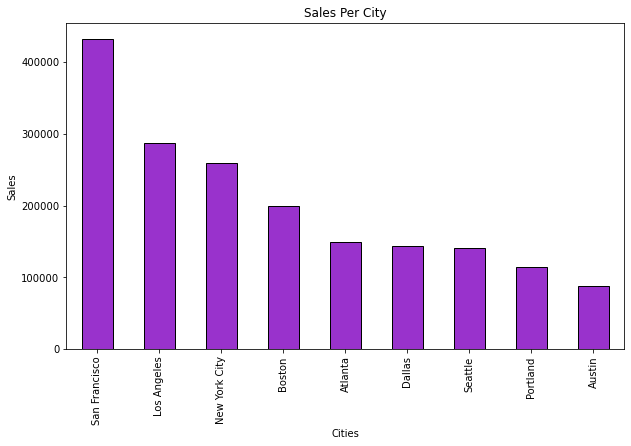

In [48]:
Top_City.plot(kind='bar', figsize=(10,6), color='darkorchid', edgecolor='black')
plt.title('Sales Per City')
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.legend().set_visible(False)
plt.show()

Conclusion : San Franciso had to most sales, followed by Los Angeles, New York City and so on as displayed above